# Setup 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

#Sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Map lib
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 2.5})

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project" 
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Variables for path for download, path for saving file and function for fetching the data 

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Call the function 

In [3]:
fetch_housing_data()

C:\Users\ljung\AppData\Local\Temp\ipykernel_18592\1387014147.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


Creates a "load to pandas DataFrame" function and call it

In [4]:


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

removes all the unwanted columns by put them in a comment

In [6]:
X = housing[[
    'longitude', 
    'latitude', 
    #'housing_median_age', 
    #'total_rooms',
    #'total_bedrooms', 
    #'population', 
    #'households', 
    'median_income',
    #'median_house_value', 
    #'ocean_proximity'
]].copy()

Scale the data

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Create variables

In [8]:
#List for Within-cluster sim of squares
wcss = [] 
#List for Silhouette scores
silhouette_scores = []

#Range for what values of K to test
k_range = range(1,16)

Loop through all the values of K and store scores in the lists above

In [9]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=120, max_iter=1000)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    if k > 1:
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)  # Silhouette score is not defined for k=1

Plot 

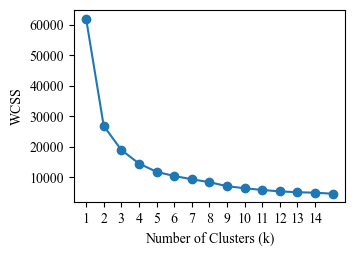

In [10]:
# Plot Elbow Method
font_size = 10
plt.figure(figsize=(3.5, 2.5))

plt.xticks(np.arange(1, 15, 1),fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)', fontsize=font_size)
plt.ylabel('WCSS', fontsize=font_size)
plt.savefig('Elbow method', dpi=300, bbox_inches='tight')
plt.show()

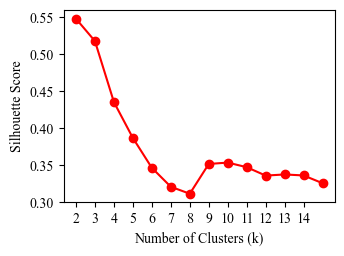

In [11]:
font_size = 10
plt.figure(figsize=(3.5, 2.5))
plt.xticks(np.arange(1, 15, 1),fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.plot([k for k in k_range if k > 1], [score for score in silhouette_scores if score is not None], marker='o', color='r')
plt.xlabel('Number of Clusters (k)',fontsize=font_size)
plt.ylabel('Silhouette Score',fontsize=font_size)
plt.savefig('Silhouette Score', dpi=300, bbox_inches='tight')
plt.show()

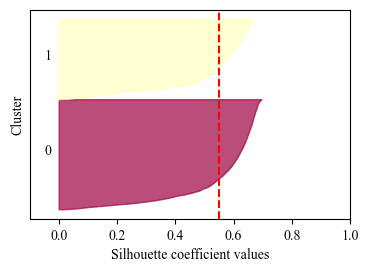

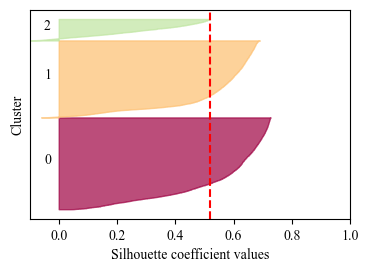

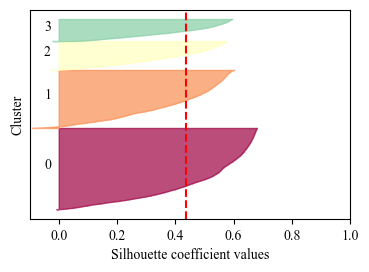

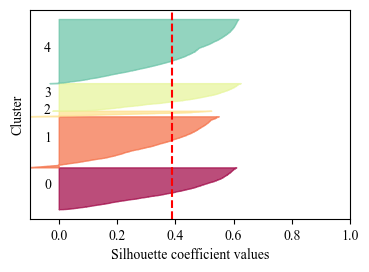

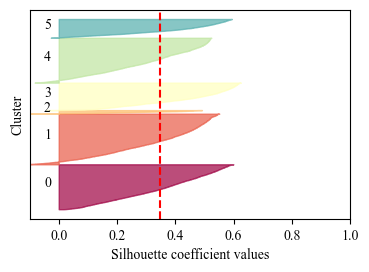

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of k values
k_range = range(2, 7)
font_size = 10
for k in k_range:
    # Fit KMeans model for each k
    kmeans = KMeans(n_clusters=k, random_state=120)
    kmeans.fit(X_scaled)

    # Get silhouette scores for each sample
    silhouette_vals = silhouette_samples(X_scaled, kmeans.labels_)

    # Plot silhouette diagram for current k
    fig, ax = plt.subplots(figsize=(3.5, 2.5))
    y_lower, y_upper = 0, 0

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        ith_cluster_silhouette_vals.sort()

        y_upper += len(ith_cluster_silhouette_vals)
        color = plt.cm.Spectral(i / float(k))  # Color map for different clusters

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot for each cluster
        ax.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i), fontsize=font_size)
        y_lower = y_upper

    # Add red dashed line for average silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_xlabel("Silhouette coefficient values", fontsize=font_size)
    ax.set_ylabel("Cluster", fontsize = font_size)

    ax.set_yticks([])  # Clear the y axis labels/ticks
    ax.set_xticks(np.arange(-1, 1.1, 0.2))
    #plt.title(f"Silhouette Plot for k={k}", fontsize=font_size) 
    ax.set_xlim(-0.1,1.0)
    plt.tight_layout()
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.savefig(f"Silhouette_plot_k{k}.png", dpi=300, bbox_inches='tight')
    plt.show()


Plot the scatter for top 4 K based on Silhouette

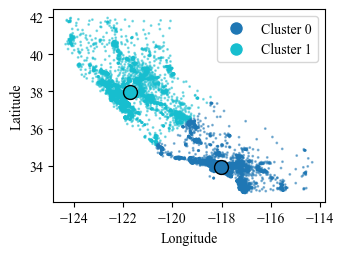

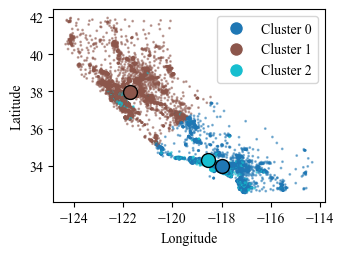

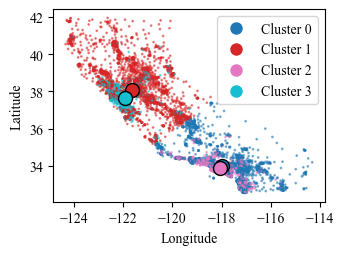

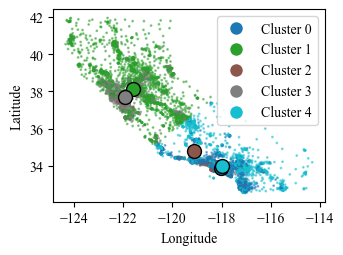

In [24]:
# Find the top 4 k values based on silhouette score
top_4_k = np.argsort(silhouette_scores[1:])[::-1][:4] + 2  # Offset by 2 to get correct k values
font_size = 10
# Plot the top 4 clustering results
for k in top_4_k:
    plt.figure(figsize=(3.5, 2.5))
    kmeans = KMeans(n_clusters=k, random_state=120)
    kmeans.fit(X_scaled)

    # Plot the clusters
    scatter = plt.scatter(X['longitude'], X['latitude'], c=kmeans.labels_, cmap='tab10', marker='o', alpha=0.5, s=1)
    
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    
    for cluster_idx, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], s=100, c=[scatter.cmap(scatter.norm(cluster_idx))], marker='o', edgecolors='black' ,linewidths=1)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10, label=f'Cluster {i}') for i in range(k)]
    plt.legend(handles=handles, fontsize=font_size)
    #plt.title(f'KMeans Clustering with k={k}')
    plt.xlabel('Longitude',fontsize=font_size)
    plt.ylabel('Latitude',fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.savefig((f'KMeans Clustering with k={k}.png'), dpi=300, bbox_inches='tight')

    plt.show()
    

## Statistics for the different clusters

In [20]:
# Fit KMeans for K=2, K=3, and K=4
kmeans_2 = KMeans(n_clusters=2, random_state=120)
kmeans_3 = KMeans(n_clusters=3, random_state=120)
kmeans_4 = KMeans(n_clusters=4, random_state=120)

# Add the cluster labels directly to the main DataFrame X
X['cluster_k2'] = kmeans_2.fit_predict(X_scaled)
X['cluster_k3'] = kmeans_3.fit_predict(X_scaled)
X['cluster_k4'] = kmeans_4.fit_predict(X_scaled)

# Create separate DataFrames only when needed
df_k2 = X[['longitude', 'latitude', 'median_income', 'cluster_k2']].copy()
df_k3 = X[['longitude', 'latitude', 'median_income', 'cluster_k3']].copy()
df_k4 = X[['longitude', 'latitude', 'median_income', 'cluster_k4']].copy()

In [30]:
# Set display format for floating point numbers globally (optional)
pd.options.display.float_format = '{:.2f}'.format

# For K=2 clusters
stats_k2 = df_k2.groupby('cluster_k2')['median_income'].agg(
    count='count',
    average=lambda x: round(x.mean(), 2),
    median=lambda x: round(x.median(), 2),
    min=lambda x: round(x.min(), 2),
    max=lambda x: round(x.max(), 2),
    pctl_25=lambda x: round(np.percentile(x, 25), 2),  # Shortened label
    pctl_50=lambda x: round(np.percentile(x, 50), 2),  # Shortened label (same as median)
    pctl_75=lambda x: round(np.percentile(x, 75), 2)   # Shortened label
)

# For K=3 clusters
stats_k3 = df_k3.groupby('cluster_k3')['median_income'].agg(
    count='count',
    average=lambda x: round(x.mean(), 2),
    median=lambda x: round(x.median(), 2),
    min=lambda x: round(x.min(), 2),
    max=lambda x: round(x.max(), 2),
    pctl_25=lambda x: round(np.percentile(x, 25), 2),
    pctl_50=lambda x: round(np.percentile(x, 50), 2),
    pctl_75=lambda x: round(np.percentile(x, 75), 2)
)

# For K=4 clusters
stats_k4 = df_k4.groupby('cluster_k4')['median_income'].agg(
    count='count',
    average=lambda x: round(x.mean(), 2),
    median=lambda x: round(x.median(), 2),
    min=lambda x: round(x.min(), 2),
    max=lambda x: round(x.max(), 2),
    pctl_25th=lambda x: round(np.percentile(x, 25), 2),
    pctl_50=lambda x: round(np.percentile(x, 50), 2),
    pctl_75=lambda x: round(np.percentile(x, 75), 2)
)

# Display the results
print("Statistics for K=2 clusters:")
print(stats_k2)

print("\nStatistics for K=3 clusters:")
print(stats_k3)

print("\nStatistics for K=4 clusters:")
print(stats_k4)


Statistics for K=2 clusters:
            count  average  median  min   max  pctl_25  pctl_50  pctl_75
cluster_k2                                                              
0           11937     3.92    3.59 0.50 15.00     2.59     3.59     4.81
1            8703     3.80    3.46 0.50 15.00     2.53     3.46     4.67

Statistics for K=3 clusters:
            count  average  median  min   max  pctl_25  pctl_50  pctl_75
cluster_k3                                                              
0            9959     3.25    3.21 0.50  5.58     2.39     3.21     4.09
1            8357     3.62    3.41 0.50  8.63     2.52     3.41     4.53
2            2324     7.44    6.65 5.06 15.00     5.95     6.65     8.25

Statistics for K=4 clusters:
            count  average  median  min   max  pctl_25th  pctl_50  pctl_75
cluster_k4                                                                
0            8815     3.04    3.08 0.50  4.74       2.30     3.08     3.79
1            6297     2.92   

In [31]:
# File path where you want to save the Excel file
file_path = "clustering_statistics.xlsx"

# Create a Pandas Excel writer object
with pd.ExcelWriter(file_path) as writer:
    # Export K=2 statistics
    stats_k2.to_excel(writer, sheet_name='K=2 Clusters')

    # Export K=3 statistics
    stats_k3.to_excel(writer, sheet_name='K=3 Clusters')

    # Export K=4 statistics
    stats_k4.to_excel(writer, sheet_name='K=4 Clusters')

In [34]:
file_path = "full_dataset_with_clusters.xlsx"
X.to_excel(file_path, index=False)